# TRANSFORMING THE DATA

In [1]:
import pandas as pd

In [2]:
file_path = "Resources/heart_disease_key_indicators.csv"

In [3]:
# Creating df from file
heart_df = pd.read_csv(file_path)
print(heart_df.shape)
heart_df.head(5)

(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# Checking column names
heart_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [5]:
# Checking columns datatypes
heart_df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [6]:
# Checking for null values
heart_df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
# Checking and removing duplicate entries
duplicates = heart_df.duplicated(keep='first')
heart_df = heart_df[~duplicates]
print(heart_df.shape)
heart_df.head(10)

(301717, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [8]:
# Transforming string 'HeartDisease' column
def change_string(row):
    if row == 'Yes':
        return 1
    else:
        return 0
    
heart_df['HeartDisease'] = heart_df['HeartDisease'].apply(change_string)
heart_df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,1,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,0,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,0,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,0,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,0,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [9]:
# Determining the number of unique values in each column
heart_df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [10]:
# Checking value_counts for AgeCategory column
age_counts = heart_df.AgeCategory.value_counts()
age_counts

65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [11]:
# Checking value_counts for BMI column
bmi_counts = heart_df.BMI.value_counts()
bmi_counts

26.63    3244
27.46    2425
27.44    2385
24.41    2173
27.12    2062
         ... 
63.85       1
48.34       1
30.97       1
68.16       1
46.56       1
Name: BMI, Length: 3604, dtype: int64

In [12]:
# Binning BMI values *based on the CDC (https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)
replace_bmi = list(bmi_counts.index)

for bmi in replace_bmi:
    if bmi >= 30.0:
        heart_df.BMI = heart_df.BMI.replace(bmi,'Obesity')
    elif bmi >= 25.0 and bmi <= 29.9:
        heart_df.BMI = heart_df.BMI.replace(bmi,'Overweight')
    elif bmi >= 18.5 and bmi <= 24.9:
        heart_df.BMI = heart_df.BMI.replace(bmi,'Healthy_Weight')
    else:
        heart_df.BMI = heart_df.BMI.replace(bmi,'Underweight')
        

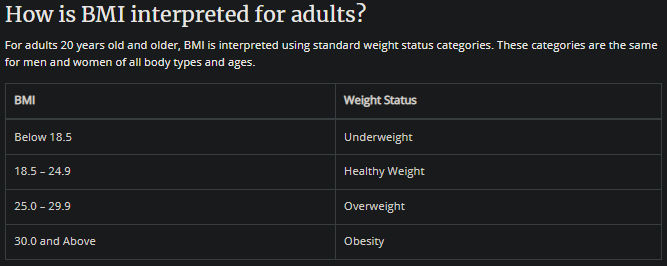

In [13]:
# Checking BMI column changes
print(heart_df.BMI.value_counts())
heart_df.head()

Overweight        103589
Obesity           100344
Healthy_Weight     88862
Underweight         8922
Name: BMI, dtype: int64


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,Underweight,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,Healthy_Weight,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,Overweight,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,Healthy_Weight,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,Healthy_Weight,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [15]:
# Using get_dummies() to create variables for text features
heart_modeling = pd.get_dummies(heart_df)
print(heart_modeling.shape)
heart_modeling.head()

(301717, 54)


,HeartDisease,PhysicalHealth,MentalHealth,SleepTime,BMI_Healthy_Weight,BMI_Obesity,BMI_Overweight,BMI_Underweight,Smoking_No,Smoking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,3.0,30.0,5.0,0,0,0,1,0,1,...,0,0,0,1,0,1,1,0,0,1
1,0,0.0,0.0,7.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,0,20.0,30.0,8.0,0,0,1,0,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0,0.0,0.0,6.0,1,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,0,28.0,0.0,8.0,1,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0


In [16]:
# Export dataframe to CSV without index
heart_df.to_csv('Resources/heart_clean.csv', index=False)
heart_modeling.to_csv('Resources/heart_dummies.csv', index=False)